# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

%matplotlib inline 

# Import API key, .env
from decouple import config
api_key = config('weather_api_key')

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

576

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# URL for GET requests to retrieve weather data
url = "http://api.openweathermap.org/data/2.5/weather?q="

In [4]:
response_json = []

In [5]:
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
ecount = 0
count = 0
sets = 0

In [6]:
# Retrieving data and converting it into JSON

print('Beginning Data Retrieval')
print('-----------------------------')

for x in range(len(cities)):
    
    try:        
        print(f'Making request: {x}, set {sets} for ID: {cities[x]}')
        post_response = requests.get(f'{url}{cities[x]}&appid={api_key}&units=imperial')
        response_json.append(post_response.json())
    except:
        print(f'Some error requesting {x}: skipping')
        ecount += 1
    count += 1
    if count == 59:
        print(f'Hold for API Limit - 60 seconds')
        #time.sleep(60)
        sets += 1
        count = 1
        # reset record counter to count the next 60 cities before another pause.
              
print("----------------------------------------")
print("Processing Completed")
print(f"{ecount} errors encounted")
print(f"Data for {len(response_json)} cities recorded")
print("----------------------------------------")
                                     

Beginning Data Retrieval
-----------------------------
Making request: 0, set 0 for ID: albany
Making request: 1, set 0 for ID: nouadhibou
Making request: 2, set 0 for ID: caruray
Making request: 3, set 0 for ID: asau
Making request: 4, set 0 for ID: muzhi
Making request: 5, set 0 for ID: torbay
Making request: 6, set 0 for ID: sao miguel do araguaia
Making request: 7, set 0 for ID: meulaboh
Making request: 8, set 0 for ID: kapaa
Making request: 9, set 0 for ID: avarua
Making request: 10, set 0 for ID: punta arenas
Making request: 11, set 0 for ID: cuenca
Making request: 12, set 0 for ID: buraydah
Making request: 13, set 0 for ID: taolanaro
Making request: 14, set 0 for ID: yar-sale
Making request: 15, set 0 for ID: yaypan
Making request: 16, set 0 for ID: houma
Making request: 17, set 0 for ID: obo
Making request: 18, set 0 for ID: east london
Making request: 19, set 0 for ID: kinshasa
Making request: 20, set 0 for ID: meyungs
Making request: 21, set 0 for ID: bambous virieux
Making r

Making request: 187, set 3 for ID: faya
Making request: 188, set 3 for ID: anna paulowna
Making request: 189, set 3 for ID: port keats
Making request: 190, set 3 for ID: nguiu
Making request: 191, set 3 for ID: tautira
Making request: 192, set 3 for ID: khatanga
Making request: 193, set 3 for ID: boquira
Making request: 194, set 3 for ID: maldonado
Making request: 195, set 3 for ID: simao
Making request: 196, set 3 for ID: coahuayana
Making request: 197, set 3 for ID: bredasdorp
Making request: 198, set 3 for ID: kenai
Making request: 199, set 3 for ID: qasigiannguit
Making request: 200, set 3 for ID: kloulklubed
Making request: 201, set 3 for ID: vutcani
Making request: 202, set 3 for ID: quatre cocos
Making request: 203, set 3 for ID: yellowknife
Making request: 204, set 3 for ID: boke
Making request: 205, set 3 for ID: tecpan
Making request: 206, set 3 for ID: morondava
Making request: 207, set 3 for ID: pekan
Making request: 208, set 3 for ID: pacific grove
Making request: 209, set

Making request: 369, set 6 for ID: opotiki
Making request: 370, set 6 for ID: meghraj
Making request: 371, set 6 for ID: olafsvik
Making request: 372, set 6 for ID: kissamos
Making request: 373, set 6 for ID: port hardy
Making request: 374, set 6 for ID: puerto el triunfo
Making request: 375, set 6 for ID: chegutu
Making request: 376, set 6 for ID: hai phong
Making request: 377, set 6 for ID: poum
Making request: 378, set 6 for ID: wajima
Making request: 379, set 6 for ID: qaqortoq
Making request: 380, set 6 for ID: iskateley
Making request: 381, set 6 for ID: tabuk
Making request: 382, set 6 for ID: bakersfield
Making request: 383, set 6 for ID: itoman
Making request: 384, set 6 for ID: henties bay
Making request: 385, set 6 for ID: mozarlandia
Making request: 386, set 6 for ID: ponta delgada
Making request: 387, set 6 for ID: touros
Making request: 388, set 6 for ID: calvinia
Making request: 389, set 6 for ID: ksenyevka
Making request: 390, set 6 for ID: bang saphan
Making request: 3

Making request: 552, set 9 for ID: bermejo
Making request: 553, set 9 for ID: alofi
Making request: 554, set 9 for ID: yanan
Making request: 555, set 9 for ID: tual
Making request: 556, set 9 for ID: woodward
Making request: 557, set 9 for ID: jiazi
Making request: 558, set 9 for ID: chibuto
Making request: 559, set 9 for ID: vila velha
Making request: 560, set 9 for ID: dunedin
Making request: 561, set 9 for ID: venado tuerto
Making request: 562, set 9 for ID: tocopilla
Making request: 563, set 9 for ID: kieta
Making request: 564, set 9 for ID: peterhead
Making request: 565, set 9 for ID: khonuu
Making request: 566, set 9 for ID: ruatoria
Making request: 567, set 9 for ID: coruripe
Making request: 568, set 9 for ID: alekseyevsk
Making request: 569, set 9 for ID: okhotsk
Making request: 570, set 9 for ID: berlevag
Making request: 571, set 9 for ID: kulhudhuffushi
Making request: 572, set 9 for ID: huilong
Making request: 573, set 9 for ID: linguere
Making request: 574, set 9 for ID: ku

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#print(response_json)

In [8]:
ecount=0
for y in range(len(response_json)):
    try:
        city.append(response_json[y]['name'])
        cloudiness.append(response_json[y]['clouds']['all'])
        country.append(response_json[y]['sys']['country'])
        date.append(response_json[y]['dt'])
        humidity.append(response_json[y]['main']['humidity'])
        lat.append(response_json[y]['coord']['lat'])
        lng.append(response_json[y]['coord']['lon'])
        max_temp.append(response_json[y]['main']['temp_max'])
        wind_speed.append(response_json[y]['wind']['speed'])
    except KeyError:
        print(f"Ok, something is wrong so skipping {y}.")
        ecount+=1
print("-----------------------------------------")
print("Done reading response_json")
print(f"{ecount} errors encounterd")
print("-----------------------------------------")

Ok, something is wrong so skipping 13.
Ok, something is wrong so skipping 20.
Ok, something is wrong so skipping 59.
Ok, something is wrong so skipping 68.
Ok, something is wrong so skipping 71.
Ok, something is wrong so skipping 73.
Ok, something is wrong so skipping 104.
Ok, something is wrong so skipping 126.
Ok, something is wrong so skipping 176.
Ok, something is wrong so skipping 185.
Ok, something is wrong so skipping 190.
Ok, something is wrong so skipping 213.
Ok, something is wrong so skipping 215.
Ok, something is wrong so skipping 234.
Ok, something is wrong so skipping 236.
Ok, something is wrong so skipping 238.
Ok, something is wrong so skipping 248.
Ok, something is wrong so skipping 249.
Ok, something is wrong so skipping 255.
Ok, something is wrong so skipping 262.
Ok, something is wrong so skipping 263.
Ok, something is wrong so skipping 275.
Ok, something is wrong so skipping 288.
Ok, something is wrong so skipping 290.
Ok, something is wrong so skipping 307.
Ok, so

In [9]:
df = pd.DataFrame([city, cloudiness, country, date, humidity, lat, lng, max_temp, wind_speed])

In [10]:
df = df.transpose()

In [11]:
df = df.rename(columns={0:"City", 1:"Cloudiness", 2:"Country", 3:"Date", 4 :"Humidity",5:"Lat",6 :"Lng",7: "Max Temp", 8 :"Wind Speed"})


In [12]:
df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,100,US,1601646826,90,42.6,-73.97,53.01,6.24
1,Nouadhibou,0,MR,1601646827,43,20.93,-17.03,87.8,26.4
2,Caruray,93,PH,1601646827,77,10.31,119.01,82.15,2.04
3,Asău,82,RO,1601646827,73,46.43,26.4,64.99,4.47
4,Muzhi,100,RU,1601646827,77,65.37,64.67,48.34,10.8
...,...,...,...,...,...,...,...,...,...
529,Kulhudhuffushi,49,MV,1601646968,75,6.62,73.07,82.2,10.98
530,Huilong,84,CN,1601646969,82,31.81,121.66,73.99,1.99
531,Linguère,0,SN,1601646969,13,15.4,-15.12,107.01,12.03
532,Kuching,40,MY,1601646862,100,1.55,110.33,77,3.36


In [13]:
#export dataframe to a csv
df.to_csv(output_data_file, encoding='utf-8',index=False)

In [14]:
from datetime import datetime
dt = datetime.now().date()

In [96]:
def plotme(x_value, y_value, x_label,y_label,title,source):
    plt.style.use('seaborn')
    fig = plt.figure(figsize= (10,6))
    plt.scatter(x = x_value, y = y_value, data = source, color = 'forestgreen')
    plt.title(f'{title} {dt}', size = 25)
    plt.xlabel(x_label, size =20)
    plt.xticks(size = 15)
    plt.ylabel(y_label, size = 20)
    plt.yticks(size = 15)
    plt.savefig(f'output_data/{title}.png')
    

In [190]:
def plot_LR(x_values, y_values, x_label,y_label,title,source,x_loc,y_loc):
    x_values = source[x_values]
    y_values = source[y_values]

#     max_temp = sh_mtemp["Max Temp"]
#     latitude = sh_mtemp["Lat"]
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
    regress_values = x_values * slope + intercept
    print(f'r-square is: {rvalue}')
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, (x_loc,y_loc),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.title(f"{title} {dt}")
    plt.ylabel(y_label)
    plt.show()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

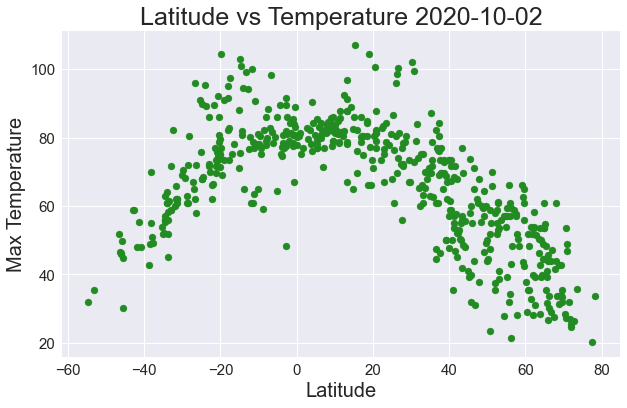

In [97]:
plotme('Lat','Max Temp','Latitude','Max Temperature','Latitude vs Temperature',df)


#### Latitude vs. Humidity Plot

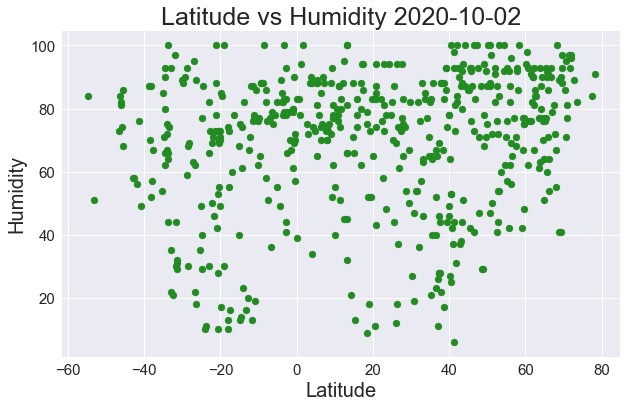

In [101]:
plotme('Lat','Humidity','Latitude','Humidity','Latitude vs Humidity',df)


#### Latitude vs. Cloudiness Plot

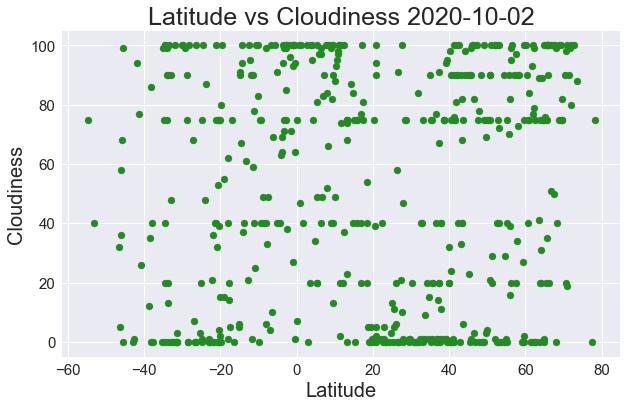

In [102]:
plotme('Lat','Cloudiness','Latitude','Cloudiness','Latitude vs Cloudiness',df)

#### Latitude vs. Wind Speed Plot

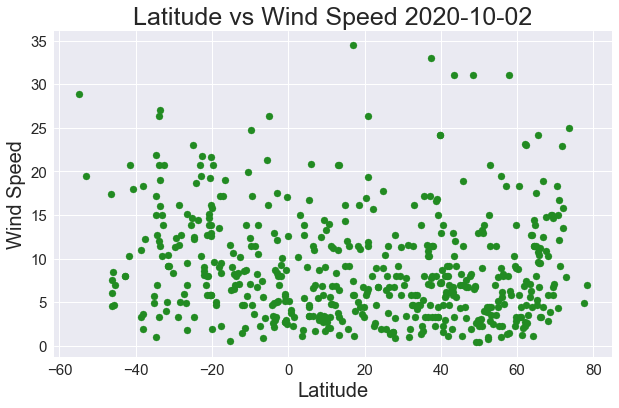

In [103]:
plotme('Lat','Wind Speed','Latitude','Wind Speed','Latitude vs Wind Speed',df)

## Linear Regression

In [104]:
# OPTIONAL: Create a function to create Linear Regression plots


In [105]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi = df[df["Lat"] > 0]
south_hemi = df[df["Lat"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.83
r-square is: -0.8288349969519603


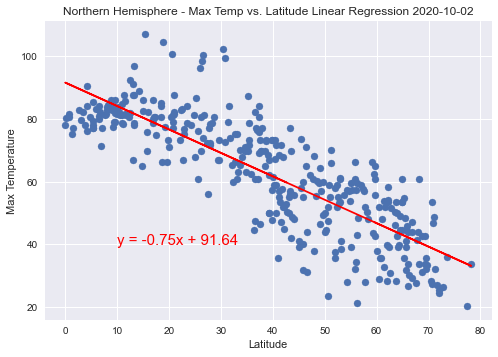

In [191]:
plot_LR('Lat','Max Temp','Latitude','Max Temperature',\
       'Northern Hemisphere - Max Temp vs. Latitude Linear Regression',north_hemi,10,40)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.69
r-square is: 0.6936125108238461


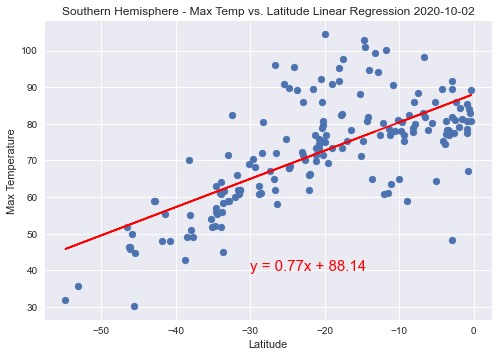

In [194]:
plot_LR('Lat','Max Temp','Latitude','Max Temperature',\
       'Southern Hemisphere - Max Temp vs. Latitude Linear Regression',south_hemi,-30,40)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.13
r-square is: 0.13169651272455246


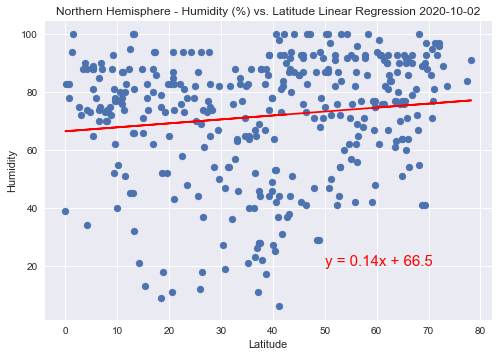

In [195]:
plot_LR('Lat','Humidity','Latitude','Humidity',\
       'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression',north_hemi,50,20)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.07
r-square is: 0.06984909148162011


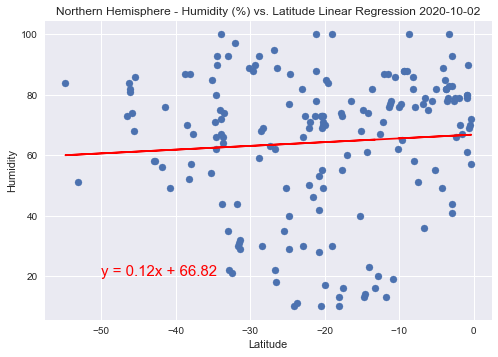

In [196]:
plot_LR('Lat','Humidity','Latitude','Humidity',\
       'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression',south_hemi,-50,20)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.07
r-square is: 0.07013362833801383


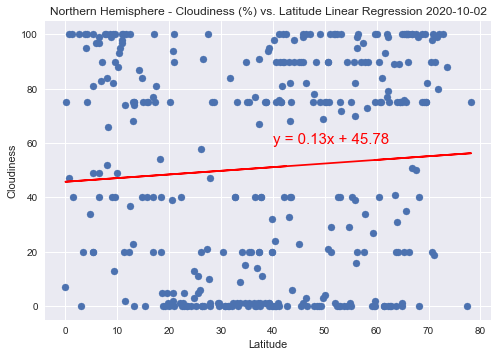

In [198]:
plot_LR('Lat','Cloudiness','Latitude','Cloudiness',\
       'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression',north_hemi,40,60)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.26
r-square is: 0.2617059473244416


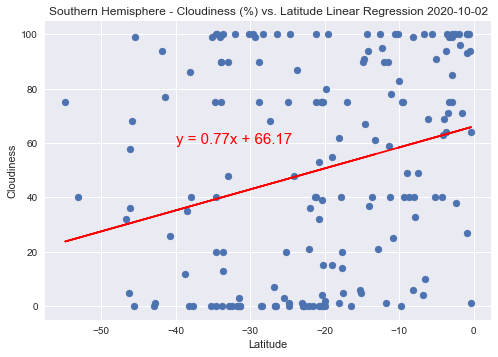

In [199]:
plot_LR('Lat','Cloudiness','Latitude','Cloudiness',\
       'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression',south_hemi,-40,60)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.1
r-square is: 0.09605453159926979


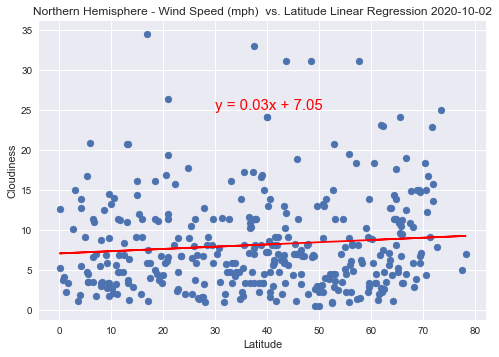

In [200]:
plot_LR('Lat','Wind Speed','Latitude','Cloudiness',\
       'Northern Hemisphere - Wind Speed (mph)  vs. Latitude Linear Regression',north_hemi,30,25)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.24
r-square is: -0.24202755424785494


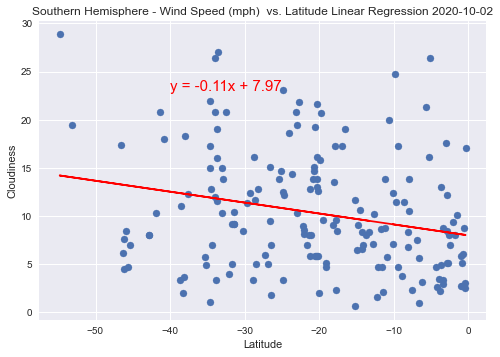

In [203]:
plot_LR('Lat','Wind Speed','Latitude','Cloudiness',\
       'Southern Hemisphere - Wind Speed (mph)  vs. Latitude Linear Regression',south_hemi,-40,23)